### Import Packages

In [35]:
from sklearn import svm, metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import random

### Load Dataset

In [37]:
# Import Uniform Small Dataset
data = np.loadtxt('/Users/elleemortensen/Documents/GitHub/BP24/Ellee/Data/uniform_small_d_1.tex')
array = np.array(data)
df = pd.DataFrame(array)

### Set-Up and Iterations

In [39]:
# Set a seed for reproducibility
np.random.seed(42)

# Assume df is your DataFrame
totalrows = df.shape[0]
totalcolumns = 35

# Sample 500 rows from the DataFrame for consistent labels
testing_indices = np.random.permutation(totalrows)-1
sampled_df = df.iloc[testing_indices, :]

# Initialize an empty list to store F1 scores
f1_scores = []

# Initialize the SVM classifier with a linear kernel
clf = svm.SVC(kernel='linear')

# Maximum iterations allowed for sampling and evaluation
max_iterations = 100

# Initialize an array to store all F1 scores across iterations and samples
allf1scores = np.zeros((totalcolumns, max_iterations))

# Iterate over different numbers of sampled columns
for i in range(5, totalcolumns):
    iterations = 0
    # Sample the first 10*(i+1) rows for each iteration
    sampled_rows = sampled_df.iloc[:10 * (i + 1), :]
    while iterations < max_iterations:
        # Randomly sample (i+1) columns from the first 10*(i+1) rows (excluding the target column)
        sampled_columns = sampled_rows.drop(columns=[totalcolumns - 1]).sample(n=i + 1, axis='columns').columns
        
        # Split the dataset into training and testing sets using the sampled indices
        X_train = sampled_rows[sampled_columns]
        y_train = sampled_rows.iloc[:, -1]
        
        # Determine the test index
        test_index = np.ceil((10 * (i+1)) / 0.7).astype(int)
        X_test = sampled_df.iloc[10 * (i + 1):test_index, sampled_columns]
        y_test = sampled_df.iloc[10 * (i + 1):test_index, -1]
        
        # Train the SVM classifier using the training sets for the sampled columns
        clf.fit(X_train, y_train)
        
        # Predict the response for the test dataset
        y_pred = clf.predict(X_test)
        
        # Calculate the F1 score and store it in the allf1scores matrix
        f1 = metrics.f1_score(y_test, y_pred)
        allf1scores[i, iterations] = f1

        # Save the training and testing data at a specific condition for further analysis
        if i == 23 and iterations == 66:
            saved_X_train = X_train.copy()
            saved_y_train = y_train.copy()
            saved_X_test = X_test.copy()
            saved_y_test = y_test.copy()
        
        # Increment the iterations counter
        iterations += 1

In [40]:
# Select 4 random columns
random_columns = random.sample(list(saved_X_train.columns), 4)
print("Randomly selected columns:", random_columns)

# Create a copy of the saved_X_train variable
cat_X_train = saved_X_train.copy()

# Process the randomly selected columns into categorical
for col in random_columns:
    cat_X_train[col] = saved_X_train[col].round().astype(int).astype("category")

# Check if 4 columns were coverted to categorical
print(cat_X_train.dtypes)

Randomly selected columns: [74, 40, 106, 58]
35      float64
12      float64
40     category
49      float64
60      float64
28      float64
80      float64
106    category
129     float64
63      float64
74     category
120     float64
122     float64
7       float64
69      float64
58     category
100     float64
127     float64
62      float64
113     float64
90      float64
76      float64
59      float64
110     float64
dtype: object


In [41]:
# Create a copy of the saved_X_test variable
cat_X_test = saved_X_test.copy()

# Process the randomly selected columns
for col in random_columns:
    cat_X_test[col] = saved_X_test[col].round().astype(int).astype("category")

# Check if 4 columns were coverted to categorical
print(cat_X_test.dtypes)

35      float64
12      float64
40     category
49      float64
60      float64
28      float64
80      float64
106    category
129     float64
63      float64
74     category
120     float64
122     float64
7       float64
69      float64
58     category
100     float64
127     float64
62      float64
113     float64
90      float64
76      float64
59      float64
110     float64
dtype: object


In [42]:
# Fit the SVM classifier using the training data with categorical features
clf.fit(cat_X_train, saved_y_train)

# Predict the response for the test dataset
y_pred = clf.predict(cat_X_test)

# Calculate the F1 score for the predictions
f1 = metrics.f1_score(saved_y_test, y_pred)

# Find the F1 score and check the shapes of the datasets
print(f1)
print(cat_X_test.shape)
print(cat_X_train.shape)

0.8282828282828283
(103, 24)
(240, 24)


In [43]:
np.argmin(allf1scores[23])

66

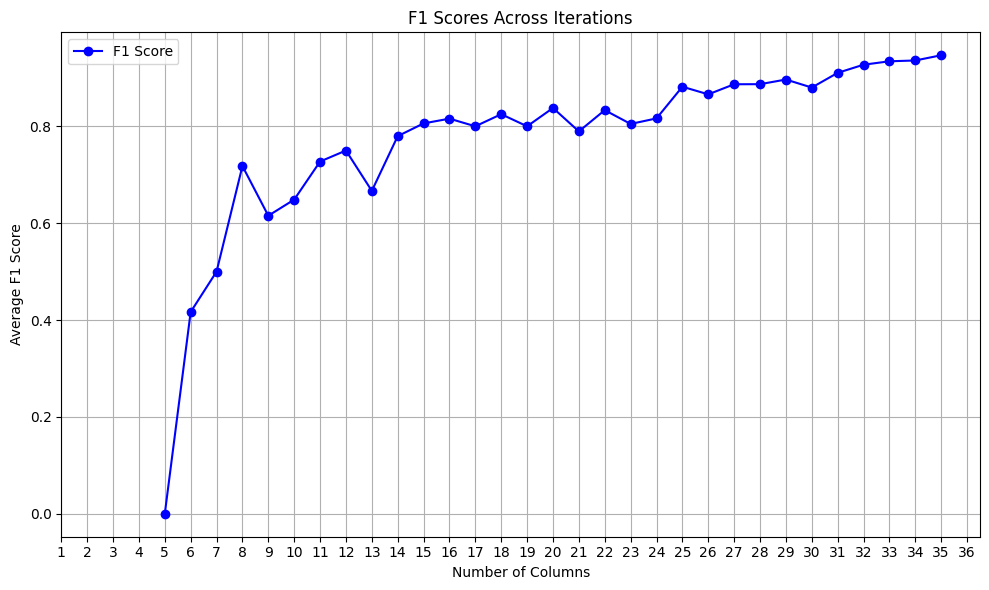

In [44]:
# Plotting the F1 scores across iterations
plt.figure(figsize=(10, 6))
plt.plot(range(5, totalcolumns+1), np.min(allf1scores[4:,:], axis=1), marker='o', linestyle='-', color='b', label='F1 Score')
plt.title('F1 Scores Across Iterations')
plt.xlabel('Number of Columns')
plt.ylabel('Average F1 Score')
plt.xticks(range(1, 37))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()